In [26]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/ARC_heuristic/PlotsPaper/')
print(os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1b0U2fABpE8D898NvKTrvvqqusm1peAQH/ARC_heuristic/PlotsPaper


final values (1.0,0.8111200321156162), (1.0,0.7788461538461539), (0.9722222222222222,0.7027743778049775), (0.903921568627451,0.8830128205128205)


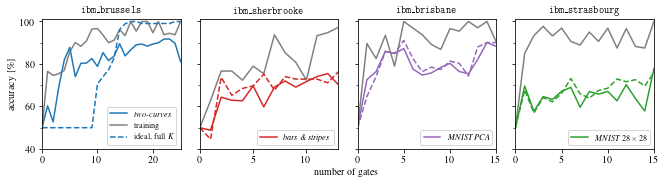

"# compare random gates with direct optimized parameters with fully optimized circuit\n\n# read random gate data\npath = '../bars-and-stripes_logLoss_randomGate/'\ntest0 = np.genfromtxt(path+'ACC_test_4d_1000.txt',usecols=0,skip_header=1)\ntest1 = np.genfromtxt(path+'ACC_test_4d_1000.txt',usecols=1,skip_header=1)\nbarsStripes_random = [test0,test1,(test0+test1)*0.5]\n\nplt.plot(np.linspace(1,len(barsStripes[2]),len(barsStripes[2])),barsStripes[2])\nplt.plot(np.linspace(1,len(barsStripes_random[2]),len(barsStripes_random[2])),barsStripes_random[2])\nplt.show()"

In [1]:
# PlotAcc_TA_paper.py
import numpy as np
import pylab as plt
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec
from matplotlib.path import Path
import matplotlib.colors
import array
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator
import matplotlib as mpl

mpl.rcParams.update({'text.usetex':True,'font.size': 12, 'font.family': 'serif', 'font.serif': ['Times', 'Computer Modern']})



def readGate(gateFile,cutoff='nan'):
	qubit = []	#id of the used qubit
	weight = []	#weight by which the angle is rotated
	layer = []	#in which layer a gate is occupied (important for gates that act on two qubits)
	gateData = open(gateFile,'r')
	layer_collect = 1
	count = 0
	for data in gateData:
		if count == cutoff:
			break
		line = data.split('\t')
		for l in range(len(line)-2):
			if line[l] == '111111': pass
			else:
				qubit.append(l)
				layer.append(layer_collect)
				weight.append(float(line[-2]))
				if line[l] == 'Rxx_x' or line[l] == 'Ryy_x' or line[l] == 'Rzz_x':
					qubit.append(l-1)
					layer.append(layer_collect)
					weight.append(float(line[-2]))
				layer_collect+=1
		if cutoff == 'nan': pass
		else:count+=1
	return [qubit,weight,layer]

def read_acc_scores(data_path, idx_group=0):
	idx_0 = idx_group*group_len
	idx_1 = idx_group*group_len + 1
	idx_avg = idx_group*group_len + 3
	idx_loss = idx_group*group_len + 4
	test0 = np.genfromtxt(data_path+'ACC.txt',usecols=idx_0,skip_header=1)
	test1 = np.genfromtxt(data_path+'ACC.txt',usecols=idx_1,skip_header=1)
	testavg = np.genfromtxt(data_path+'ACC.txt',usecols=idx_avg,skip_header=1)
	loss = np.genfromtxt(data_path+'ACC.txt',usecols=idx_loss,skip_header=1)
	assert np.allclose(testavg, (test0 + test1) / 2)
	test0 = np.array([0.5,*test0])
	test1 = np.array([0.5,*test1])
	loss = np.array([0.0,*loss])
	return [test0,test1,(test0+test1)*0.5, loss]

def read_reconstruction_scores(data_path):
	headers = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
	start_col_idx = group_len*len(idx_groups)
	headers = headers[start_col_idx:]
	scores = np.genfromtxt(data_path+'ACC.txt',usecols=range(start_col_idx,start_col_idx+len(headers)),skip_header=1)
 # pad with leading np.nan
	scores = np.insert(scores,len(scores),np.nan,axis=0)
	return dict(zip(headers,scores.T))


group_len = 5
idx_groups = {
		 'sim': 0,
		 'sim_tr': 1,
		 'ibm': 2,
		 'ibm_tr': 3,
		 'mini': 4,
		 'mini_tr': 5,
}

#import data

#two-curves
path = 'Data_TA/IBM_TC/'
twoCurves = read_acc_scores(path, idx_group=idx_groups['ibm'])
twoCurves_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
twoCurves_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
twoCurves_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
twoCurves_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
twoCurves_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
twoCurves_qubit,twoCurves_weight,twoCurves_layer = readGate(path+'Gate.txt','nan')
twoCurvesRec = read_reconstruction_scores(path)
headers = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)

#bars-stripes
path = 'Data_TA/IBM_BS/'
barsStripes = read_acc_scores(path, idx_group=idx_groups['ibm'])
barsStripes_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
barsStripes_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
barsStripes_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
barsStripes_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
barsStripes_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
barsStripes_qubit,barsStripes_weight,barsStripes_layer = readGate(path+'Gate.txt','nan')
barsStripesRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)

#mnist-pca
path = 'Data_TA/IBM_MN/'
mnistPca = read_acc_scores(path, idx_group=idx_groups['ibm'])
mnistPca_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
mnistPca_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
mnistPca_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
mnistPca_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
mnistPca_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
mnistPca_qubit,mnistPca_weight,mnistPca_layer = readGate(path+'Gate.txt','nan')
mnistPcaRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)

#mnist-full-res
path = 'Data_TA/IBM_MN_noPCA/'
mnistNoPca = read_acc_scores(path, idx_group=idx_groups['ibm'])
mnistNoPca_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
mnistNoPca_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
mnistNoPca_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
mnistNoPca_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
mnistNoPca_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
mnistNoPca_qubit,mnistNoPca_weight,mnistNoPca_layer = readGate(path+'Gate.txt','nan')
mnistNoPcaRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)


# IMPORTANT: MNIST noPCA will be plot in ax2 but ax2 will be displayed in the last column


fig = plt.figure(figsize = (11.69*0.8,8.27*0.45*8/11+0.065))
gs = gridspec.GridSpec(1,4,height_ratios=[1])


ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[3],sharey=ax1)  # swap ax2 to the end
ax3 = plt.subplot(gs[1],sharey=ax1)
ax4 = plt.subplot(gs[2],sharey=ax1)
#ax5 = plt.subplot(gs[4],sharex=ax1)
#ax6 = plt.subplot(gs[7],sharex=ax2,sharey=ax5)
#ax7 = plt.subplot(gs[5],sharex=ax3,sharey=ax5)
#ax8 = plt.subplot(gs[6],sharex=ax4,sharey=ax5)

ax = [[ax1,ax2,ax3,ax4]#,[ax5,ax6,ax7,ax8]#, [ax9, ax10, ax11, ax12]
      ]


ax1.set_title('$\\mathtt{ibm\\_brussels}$', fontsize=10)
ax2.set_title('$\\mathtt{ibm\\_strasbourg}$', fontsize=10)
ax3.set_title('$\\mathtt{ibm\\_sherbrooke}$', fontsize=10)
ax4.set_title('$\\mathtt{ibm\\_brisbane}$', fontsize=10)


############ ACCURACY PLOTS ############

# plot test
ax1.plot(np.linspace(0,len(twoCurves[2])-1,len(twoCurves[2])),twoCurves[2]*100,
	'-',color='tab:blue',zorder=1,label=r'\textit{two-curves}')#,fillstyle='none')
ax2.plot(np.linspace(0,len(mnistNoPca[2])-1,len(mnistNoPca[2])),mnistNoPca[2]*100,
	'-',color='tab:green',zorder=1,label=r'\textit{MNIST} $28\times28$')#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes[2])-1,len(barsStripes[2])),barsStripes[2]*100,
	'-',color='tab:red',zorder=1,label=r'\textit{bars \& stripes}')#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca[2])-1,len(mnistPca[2])),mnistPca[2]*100,
	'-',color='tab:purple',zorder=1,label=r'\textit{MNIST PCA}')#,fillstyle='none')


# plot train
ax1.plot(np.linspace(0,len(twoCurves_train[2])-1,len(twoCurves_train[2])),twoCurves_train[2]*100,
	'-',label='training',color='grey',zorder=0)#,fillstyle='none')
ax2.plot(np.linspace(0,len(mnistNoPca_train[2])-1,len(mnistNoPca_train[2])),mnistNoPca_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes_train[2])-1,len(barsStripes_train[2])),barsStripes_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca_train[2])-1,len(mnistPca_train[2])),mnistPca_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')




# extra results
ax1.plot(np.linspace(0,len(twoCurves_sim[2])-1,len(twoCurves_sim[2])),twoCurves_sim[2]*100,
	'--',color='tab:blue',zorder=0.5,label='ideal, full $K$')
ax2.plot(np.linspace(0,len(mnistNoPca_sim[2])-1,len(mnistNoPca_sim[2])),mnistNoPca_sim[2]*100,
	'--',color='tab:green',zorder=0.5)
ax3.plot(np.linspace(0,len(barsStripes_sim[2])-1,len(barsStripes_sim[2])),barsStripes_sim[2]*100,
	'--',color='tab:red',zorder=0.5)
ax4.plot(np.linspace(0,len(mnistPca_sim[2])-1,len(mnistPca_sim[2])),mnistPca_sim[2]*100,
	'--',color='tab:purple',zorder=0.5)


'''############ LOSS PLOTS ############
# plot test
ax5.plot(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),twoCurves[3],
	'-',color='tab:blue',zorder=1,label='two curves')#,fillstyle='none')
ax6.plot(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),mnistNoPca[3],
	'-',color='tab:green',zorder=1,label='MNIST $28 \\times 28$')#,fillstyle='none')
ax7.plot(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),barsStripes[3],
	'-',color='tab:red',zorder=1,label='bars & stripes')#,fillstyle='none')
ax8.plot(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),mnistPca[3],
	'-',color='tab:purple',zorder=1,label='MNIST PCA')#,fillstyle='none')



# extra results
ax5.plot(np.linspace(0,len(twoCurves_sim[3])-1,len(twoCurves_sim[3])),twoCurves_sim[3],
	'--',color='tab:blue',zorder=0.5,label='sim full $K$')#,fillstyle='none')
#ax5.plot(np.linspace(0,len(twoCurves_mini[3])-1,len(twoCurves_mini[3])),twoCurves_mini[3],
#	'-.',color='tab:blue',zorder=0.5,label='sim mini $K$')#,fillstyle='none')
#ax5.plot(np.linspace(0,len(twoCurves_sim_train[3])-1,len(twoCurves_sim_train[3])),twoCurves_sim_train[3],
#	'--',color='grey',zorder=-0.5)#,fillstyle='none')
#ax5.plot(np.linspace(0,len(twoCurves_mini_train[3])-1,len(twoCurves_mini_train[3])),twoCurves_mini_train[3],
#	'-.',color='grey',zorder=-0.5)#,fillstyle='none')
ax6.plot(np.linspace(0,len(mnistNoPca_sim[3])-1,len(mnistNoPca_sim[3])),mnistNoPca_sim[3],
	'--',color='tab:green',zorder=0.5)#,fillstyle='none')
#ax6.plot(np.linspace(0,len(mnistNoPca_mini[3])-1,len(mnistNoPca_mini[3])),mnistNoPca_mini[3],
#	'-.',color='tab:green',zorder=0.5)#,fillstyle='none')
#ax6.plot(np.linspace(0,len(mnistNoPca_sim_train[3])-1,len(mnistNoPca_sim_train[3])),mnistNoPca_sim_train[3],
#	'--',color='grey',zorder=-0.5)#,fillstyle='none')
#ax6.plot(np.linspace(0,len(mnistNoPca_mini_train[3])-1,len(mnistNoPca_mini_train[3])),mnistNoPca_mini_train[3],
#	'-.',color='grey',zorder=-0.5)#,fillstyle='none')
ax7.plot(np.linspace(0,len(barsStripes_sim[3])-1,len(barsStripes_sim[3])),barsStripes_sim[3],
	'--',color='tab:red',zorder=0.5)#,fillstyle='none')
#ax7.plot(np.linspace(0,len(barsStripes_mini[3])-1,len(barsStripes_mini[3])),barsStripes_mini[3],
#	'-.',color='tab:red',zorder=0.5)#,fillstyle='none')
#ax7.plot(np.linspace(0,len(barsStripes_sim_train[3])-1,len(barsStripes_sim_train[3])),barsStripes_sim_train[3],
#	'--',color='grey',zorder=-0.5)#,fillstyle='none')
#ax7.plot(np.linspace(0,len(barsStripes_mini_train[3])-1,len(barsStripes_mini_train[3])),barsStripes_mini_train[3],
#	'-.',color='grey',zorder=-0.5)#,fillstyle='none')
ax8.plot(np.linspace(0,len(mnistPca_sim[3])-1,len(mnistPca_sim[3])),mnistPca_sim[3],
	'--',color='tab:purple',zorder=0.5)#,fillstyle='none')
#ax8.plot(np.linspace(0,len(mnistPca_mini[3])-1,len(mnistPca_mini[3])),mnistPca_mini[3],
#	'-.',color='tab:purple',zorder=0.5)#,fillstyle='none')
#ax8.plot(np.linspace(0,len(mnistPca_sim_train[3])-1,len(mnistPca_sim_train[3])),mnistPca_sim_train[3],
#	'--',color='grey',zorder=-0.5)#,fillstyle='none')
#ax8.plot(np.linspace(0,len(mnistPca_mini_train[3])-1,len(mnistPca_mini_train[3])),mnistPca_mini_train[3],
#	'-.',color='grey',zorder=-0.5)#,fillstyle='none')

# plot train
ax5.plot(np.linspace(0,len(twoCurves_train[3])-1,len(twoCurves_train[3])),twoCurves_train[3],
	'-',label='training',color='grey',zorder=0)#,fillstyle='none')
ax6.plot(np.linspace(0,len(mnistNoPca_train[3])-1,len(mnistNoPca_train[3])),mnistNoPca_train[3],
	'-',color='grey',zorder=0)#,fillstyle='none')
ax7.plot(np.linspace(0,len(barsStripes_train[3])-1,len(barsStripes_train[3])),barsStripes_train[3],
	'-',color='grey',zorder=0)#,fillstyle='none')
ax8.plot(np.linspace(0,len(mnistPca_train[3])-1,len(mnistPca_train[3])),mnistPca_train[3],
	'-',color='grey',zorder=0)#,fillstyle='none')'''




############ RECONSTRUCTION QUALITY PLOTS ############
# mean as line, std as bands
#ax9.plot(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),twoCurvesRec['RMSE_mean'],
#	'-',color='grey',zorder=0.5,label='mitigated')  # mean as line
#ax9.fill_between(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),
#									twoCurvesRec['RMSE_mean']-twoCurvesRec['RMSE_std'],
#	                twoCurvesRec['RMSE_mean']+twoCurvesRec['RMSE_std'], color='grey', alpha=0.33)

#ax9.plot(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),twoCurvesRec['RMSE_mean_raw'],
#	'-',color='grey',zorder=0.5,label='raw')  # mean as line
#ax9.fill_between(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),
#									twoCurvesRec['RMSE_mean_raw']-twoCurvesRec['RMSE_std_raw'],
#	                twoCurvesRec['RMSE_mean_raw']+twoCurvesRec['RMSE_std_raw'], color='grey', alpha=0.33)


#ax10.plot(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),mnistNoPcaRec['RMSE_mean'],
#	'-',color='grey',zorder=0.5,label='mitigated')  # mean as line
#ax10.fill_between(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),
#									mnistNoPcaRec['RMSE_mean']-mnistNoPcaRec['RMSE_std'],
#	                mnistNoPcaRec['RMSE_mean']+mnistNoPcaRec['RMSE_std'], color='grey', alpha=0.33)

#ax10.plot(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),mnistNoPcaRec['RMSE_mean_raw'],
#	'-',color='grey',zorder=0.5,label='raw')  # mean as line
#ax10.fill_between(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),
#									mnistNoPcaRec['RMSE_mean_raw']-mnistNoPcaRec['RMSE_std_raw'],
#	                mnistNoPcaRec['RMSE_mean_raw']+mnistNoPcaRec['RMSE_std_raw'], color='grey', alpha=0.33)


#ax11.plot(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),barsStripesRec['RMSE_mean'],
#	'-',color='grey',zorder=0.5,label='mitigated')  # mean as line
#ax11.fill_between(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),
#									barsStripesRec['RMSE_mean']-barsStripesRec['RMSE_std'],
#	                barsStripesRec['RMSE_mean']+barsStripesRec['RMSE_std'], color='grey', alpha=0.33)

#ax11.plot(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),barsStripesRec['RMSE_mean_raw'],
#	'-',color='grey',zorder=0.5,label='raw')  # mean as line
#ax11.fill_between(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),
#									barsStripesRec['RMSE_mean_raw']-barsStripesRec['RMSE_std_raw'],
#	                barsStripesRec['RMSE_mean_raw']+barsStripesRec['RMSE_std_raw'], color='grey', alpha=0.33)



#ax12.plot(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),mnistPcaRec['RMSE_mean'],
#	'-',color='grey',zorder=0.5,label='mitigated')  # mean as line
#ax12.fill_between(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),
#									mnistPcaRec['RMSE_mean']-mnistPcaRec['RMSE_std'],
#	                mnistPcaRec['RMSE_mean']+mnistPcaRec['RMSE_std'], color='grey', alpha=0.33)

#ax12.plot(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),mnistPcaRec['RMSE_mean_raw'],
#	'-',color='grey',zorder=0.5,label='raw')  # mean as line
#ax12.fill_between(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),
#									mnistPcaRec['RMSE_mean_raw']-mnistPcaRec['RMSE_std_raw'],
#	                mnistPcaRec['RMSE_mean_raw']+mnistPcaRec['RMSE_std_raw'], color='grey', alpha=0.33)





print(f'final values ({twoCurves_train[2][-1]},{twoCurves[2][-1]}), ({mnistNoPca_train[2][-1]},{mnistNoPca[2][-1]}), ({barsStripes_train[2][-1]},{barsStripes[2][-1]}), ({mnistPca_train[2][-1]},{mnistPca[2][-1]})')


cvals = [min(twoCurves_weight),max(twoCurves_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:blue']))
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(mnistNoPca_weight),max(mnistNoPca_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:green']))
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(barsStripes_weight),max(barsStripes_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:red']))
cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(mnistPca_weight),max(mnistPca_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:purple']))
cmap4 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)


ax1.set_ylim(0.4*100,1.01*100)
ax2.set_ylim(0.4*100,1.01*100)
ax3.set_ylim(0.4*100,1.01*100)
ax4.set_ylim(0.4*100,1.01*100)

ax1.set_xlim(0,len(twoCurves[2])-1)
ax2.set_xlim(0,len(mnistNoPca[2])-1)
ax3.set_xlim(0,len(barsStripes[2])-1)
ax4.set_xlim(0,len(mnistPca[2])-1)
#ax5.set_ylim(-1,max_n_qubit)


ax1.set_ylabel(r'accuracy [\%]')
#ax5.set_ylabel(r'Loss $L_{\rm TA}$')
#ax9.set_ylabel(r'Pool err.')

#ax1.tick_params(labelbottom = False)
ax2.tick_params(labelleft = False)# ,labelbottom = False)
ax3.tick_params(labelleft = False)# ,labelbottom = False)
ax4.tick_params(labelleft = False)# ,labelbottom = False)
#ax5.tick_params(labelbottom = False)
#ax6.tick_params(labelleft = False)#, labelbottom = False)
#ax7.tick_params(labelleft = False)#, labelbottom = False)
#ax8.tick_params(labelleft = False)#, labelbottom = False)
#ax10.tick_params(labelleft = False)
#ax11.tick_params(labelleft = False)
#ax12.tick_params(labelleft = False)

#ax5.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax9.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#ynumbers = []
#ynames = []
#for i in range(max_n_qubit):
#	ynumbers.append(i)
#	if i%3==0:
#		ynames.append(r'$|0\rangle$')
#	else:
#		ynames.append(' ')
#
#ax5.set_yticks(ynumbers,ynames)

lines_labels = [ax1.get_legend_handles_labels(),
	ax2.get_legend_handles_labels(),
	ax3.get_legend_handles_labels(),
	ax4.get_legend_handles_labels()]
lines,labels = [sum(lol, []) for lol in zip(*lines_labels)]


fig.supxlabel('number of gates',y=0.093,x=0.52,fontsize='medium')


ax1.legend(loc='lower right',fontsize='small')
ax2.legend(loc='lower right',fontsize='small')
ax3.legend(loc='lower right',fontsize='small')
ax4.legend(loc='lower right',fontsize='small')


ax1.yaxis.set_minor_locator(AutoMinorLocator(n=2))


fig.align_ylabels(np.asarray(ax)[:, 0])

plt.tight_layout()
plt.savefig('Acc_TA_IBM_paper.pdf')
plt.show()


'''# compare random gates with direct optimized parameters with fully optimized circuit

# read random gate data
path = '../bars-and-stripes_logLoss_randomGate/'
test0 = np.genfromtxt(path+'ACC_test_4d_1000.txt',usecols=0,skip_header=1)
test1 = np.genfromtxt(path+'ACC_test_4d_1000.txt',usecols=1,skip_header=1)
barsStripes_random = [test0,test1,(test0+test1)*0.5]

plt.plot(np.linspace(1,len(barsStripes[2]),len(barsStripes[2])),barsStripes[2])
plt.plot(np.linspace(1,len(barsStripes_random[2]),len(barsStripes_random[2])),barsStripes_random[2])
plt.show()'''

In [28]:

print(twoCurvesRec['RMSE_mean'] - twoCurvesRec['RMSE_mean_raw'])
print(barsStripesRec['RMSE_mean'] - barsStripesRec['RMSE_mean_raw'])
print(mnistPcaRec['RMSE_mean'] - mnistPcaRec['RMSE_mean_raw'])
print(mnistNoPcaRec['RMSE_mean'] - mnistNoPcaRec['RMSE_mean_raw'])

[-4.79992240e-02 -1.10931109e-04  5.22130530e-04  1.03066589e-03
  8.40590971e-04  4.75787524e-04  7.20108413e-04  8.36838646e-04
  1.16931103e-03  1.52726831e-03  1.65614344e-03  2.00658197e-04
  3.47161239e-04  1.43043071e-04  5.08095899e-05  1.99729774e-04
 -2.22281237e-04 -6.64405798e-04 -4.03195483e-04 -2.71093111e-04
 -1.49426840e-05 -8.17465638e-05  2.73835753e-04 -3.84501047e-04
 -1.07108531e-03             nan]
[-0.01221681 -0.01031501 -0.01209169 -0.00892805 -0.0042062  -0.00363594
 -0.00337217 -0.00410172 -0.00175336 -0.0028124  -0.00101628 -0.00104749
 -0.00041649         nan]
[-0.01778127 -0.01033973 -0.01255161 -0.0101636  -0.0057903  -0.00593074
 -0.00396584 -0.00285589 -0.0044994  -0.00316266 -0.00388385 -0.0032023
 -0.00332762 -0.0030987  -0.00447348         nan]
[-0.02054185  0.00026171 -0.00229467 -0.00182635 -0.00176464 -0.00096593
 -0.00131786 -0.00153688 -0.00142883 -0.00115308 -0.00156127 -0.00035483
 -0.00063945 -0.0006142   0.00013818         nan]


In [29]:
twoCurvesRec['RMSE_mean'][1:][10:14]

array([0.14851206, 0.15705158, 0.15732548, 0.15207928])

In [30]:
# Print all test accuracies
print(twoCurves[2], "\n", np.max(twoCurves[2]), np.argmax(twoCurves[2]))
print(mnistNoPca[2], "\n", np.max(mnistNoPca[2]), np.argmax(mnistNoPca[2]))
print(barsStripes[2], "\n", np.max(barsStripes[2]), np.argmax(barsStripes[2]))
print(mnistPca[2], "\n", np.max(mnistPca[2]), np.argmax(mnistPca[2]))

[0.5        0.60317142 0.52769972 0.68928141 0.81814532 0.8783621
 0.74026495 0.80289041 0.80409474 0.82537134 0.7886391  0.8534725
 0.81573665 0.83701325 0.89482136 0.83821758 0.86672019 0.89020474
 0.89361702 0.88418306 0.89381774 0.8996387  0.91730229 0.91730229
 0.89723003 0.81112003] 
 0.9173022882376556 22
[0.5        0.6963141  0.57692308 0.64663462 0.63301282 0.67147436
 0.68990385 0.59615385 0.66987179 0.65785256 0.67067308 0.62660256
 0.70272436 0.63701923 0.57852564 0.77884615] 
 0.7788461538461539 15
[0.5        0.48816809 0.64361485 0.62913097 0.62668299 0.69665443
 0.59812322 0.69114647 0.72011424 0.69094247 0.71685027 0.74051408
 0.75499796 0.70277438] 
 0.7549979600163199 12
[0.5        0.72596154 0.76442308 0.85977564 0.84935897 0.87259615
 0.77564103 0.74759615 0.75801282 0.78365385 0.80288462 0.76442308
 0.75400641 0.8213141  0.90144231 0.88301282] 
 0.9014423076923077 14
